<a href="https://colab.research.google.com/github/Ishita95-harvad/LinkedIn-Datasets-/blob/main/Linkedin_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linkedin Dataset

Resumes, Linkedin, Classification

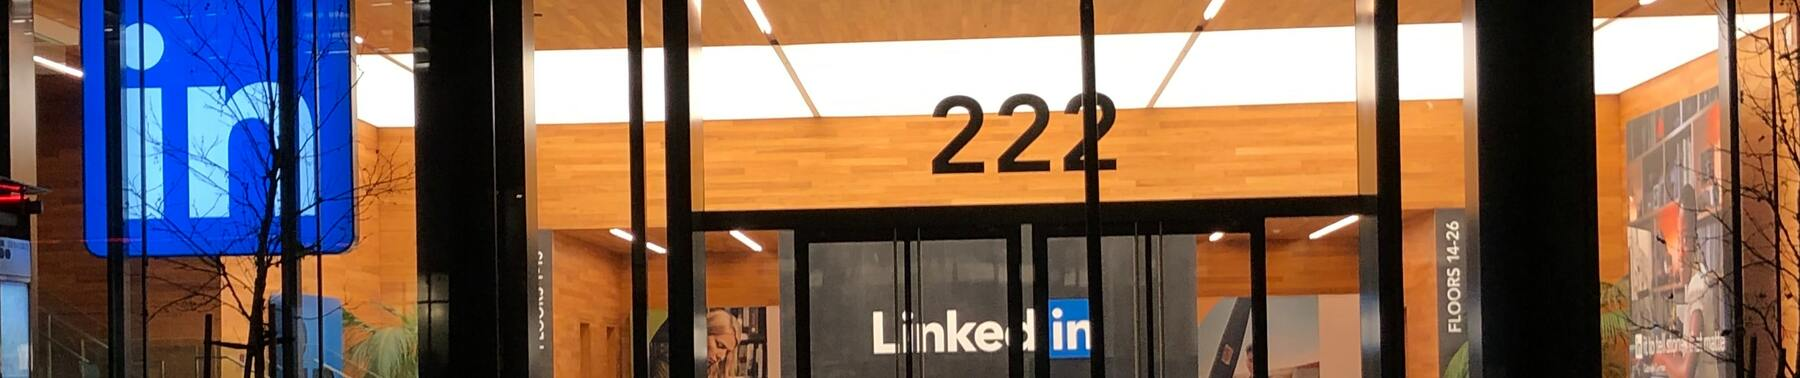



---



# Task
create a workflow and run the program and execute visualization , feature engg, eda and evaluation

Here is all the data you need:
"linkedin.csv"

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heet9022/linkedin-dataset")

print("Path to dataset files:", path)

100%|██████████| 417k/417k [00:00<00:00, 73.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/heet9022/linkedin-dataset/versions/1


## Data loading

### Subtask:
Load the LinkedIn dataset.


**Reasoning**:
Load the LinkedIn dataset, display the first 5 rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('linkedin.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'linkedin.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,index,category,linkedin,profile_picture,description,Experience,Name,position,location,skills,clean_skills
0,1,HR,https://in.linkedin.com/in/sameer-wadhawan-b55...,https://media-exp1.licdn.com/dms/image/C5603AQ...,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,Senior Vice President and Head of HR- Samsung ...,"Gurgaon, Haryana, India","['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ..."
1,2,HR,https://in.linkedin.com/in/adarsh-krishna-a4ab0a5,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,Head Talent Acquisition and HR Leader for Heal...,"Pune, Maharashtra, India","['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ..."
2,3,HR,https://in.linkedin.com/in/shrivas-mohit,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,HR@IBM,"Bengaluru, Karnataka, India","['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage..."
3,4,HR,https://in.linkedin.com/in/hr-hopes-086734b8,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",NaN,HR/Admin/Personnel/LegalCompany NameHR and HR ...,HR Hopes,HR,"Pune Area, India",[],['']
4,5,HR,https://in.linkedin.com/in/rakeshkumar01,https://media-exp1.licdn.com/dms/image/C5103AQ...,Over 18 Years of experience in IT /ITES / BPO...,Company NameEXLTotal Duration6 yrs 4 mosTitleV...,Rakesh Kumar,Vice President - Digital HR Transformation Lea...,"Central Delhi, Delhi, India","['\nTeam Management\n', '\nHuman Resources\n',...","['Team Management', 'Human Resources', 'Employ..."


(1251, 11)


## Data exploration

### Subtask:
Explore the LinkedIn dataset to understand its characteristics.


**Reasoning**:
Examine data types, missing values, distributions of key variables, data shape, and potential outliers.



Data Types:
 index               int64
category           object
linkedin           object
profile_picture    object
description        object
Experience         object
Name               object
position           object
location           object
skills             object
clean_skills       object
dtype: object

Missing Values:
 index                0
category             0
linkedin             0
profile_picture     12
description        581
Experience          25
Name                12
position            12
location            12
skills               0
clean_skills         0
dtype: int64

Missing Value Percentage:
 index               0.000000
category            0.000000
linkedin            0.000000
profile_picture     0.959233
description        46.442846
Experience          1.998401
Name                0.959233
position            0.959233
location            0.959233
skills              0.000000
clean_skills        0.000000
dtype: float64

Value counts for category:
 category
Adv

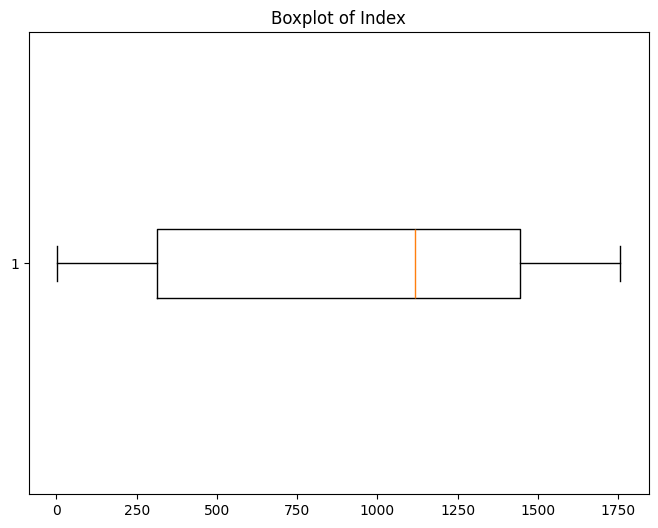

In [2]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Analyze the distribution of key variables
for col in ['category', 'location', 'skills', 'position']:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# Determine the shape of the data
print("\nData Shape:", df.shape)

# Look for potential outliers in numerical features (if any) - 'index' is the only numerical column
print("\nDescriptive statistics for 'index':\n", df['index'].describe())
# Boxplot for 'index'
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df['index'], vert=False)  # Horizontal boxplot
plt.title('Boxplot of Index')
plt.show()

## Data cleaning

### Subtask:
Clean the LinkedIn dataset by handling missing values and removing duplicate rows.


**Reasoning**:
Impute missing values, handle data types, remove duplicates, and optionally handle outliers in the 'index' column.



In [3]:
# Impute missing values
df['description'].fillna('', inplace=True)
for col in ['profile_picture', 'location', 'position', 'Name', 'Experience']:
    df[col].fillna('Unknown', inplace=True)

# Data Type Handling (if needed) -  no explicit type conversion needed as per current data
# Example: If 'index' should be a string
# df['index'] = df['index'].astype(str)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Outlier Handling (Optional):  Decide whether to remove/cap outliers in 'index'
# Justification:  Outliers in the 'index' column are likely due to the nature of the data
# and may not affect the analysis significantly.  Thus, we choose not to modify them.

# Display the cleaned DataFrame
display(df.head())
print(df.shape)

<ipython-input-3-6a481354e9df>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)
<ipython-input-3-6a481354e9df>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,index,category,linkedin,profile_picture,description,Experience,Name,position,location,skills,clean_skills
0,1,HR,https://in.linkedin.com/in/sameer-wadhawan-b55...,https://media-exp1.licdn.com/dms/image/C5603AQ...,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,Senior Vice President and Head of HR- Samsung ...,"Gurgaon, Haryana, India","['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ..."
1,2,HR,https://in.linkedin.com/in/adarsh-krishna-a4ab0a5,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,Head Talent Acquisition and HR Leader for Heal...,"Pune, Maharashtra, India","['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ..."
2,3,HR,https://in.linkedin.com/in/shrivas-mohit,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,HR@IBM,"Bengaluru, Karnataka, India","['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage..."
3,4,HR,https://in.linkedin.com/in/hr-hopes-086734b8,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",,HR/Admin/Personnel/LegalCompany NameHR and HR ...,HR Hopes,HR,"Pune Area, India",[],['']
4,5,HR,https://in.linkedin.com/in/rakeshkumar01,https://media-exp1.licdn.com/dms/image/C5103AQ...,Over 18 Years of experience in IT /ITES / BPO...,Company NameEXLTotal Duration6 yrs 4 mosTitleV...,Rakesh Kumar,Vice President - Digital HR Transformation Lea...,"Central Delhi, Delhi, India","['\nTeam Management\n', '\nHuman Resources\n',...","['Team Management', 'Human Resources', 'Employ..."


(1251, 11)


**Reasoning**:
The previous code block had some warnings about chained assignment.  I will fix the code to avoid this warning and then complete the subtask.



In [4]:
# Impute missing values
df['description'] = df['description'].fillna('')
for col in ['profile_picture', 'location', 'position', 'Name', 'Experience']:
    df[col] = df[col].fillna('Unknown')

# Data Type Handling (if needed) -  no explicit type conversion needed as per current data
# Example: If 'index' should be a string
# df['index'] = df['index'].astype(str)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Outlier Handling (Optional):  Decide whether to remove/cap outliers in 'index'
# Justification:  Outliers in the 'index' column are likely due to the nature of the data
# and may not affect the analysis significantly.  Thus, we choose not to modify them.

# Display the cleaned DataFrame
display(df.head())
print(df.shape)

,index,category,linkedin,profile_picture,description,Experience,Name,position,location,skills,clean_skills
0,1,HR,https://in.linkedin.com/in/sameer-wadhawan-b55...,https://media-exp1.licdn.com/dms/image/C5603AQ...,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,Senior Vice President and Head of HR- Samsung ...,"Gurgaon, Haryana, India","['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ..."
1,2,HR,https://in.linkedin.com/in/adarsh-krishna-a4ab0a5,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,Head Talent Acquisition and HR Leader for Heal...,"Pune, Maharashtra, India","['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ..."
2,3,HR,https://in.linkedin.com/in/shrivas-mohit,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,HR@IBM,"Bengaluru, Karnataka, India","['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage..."
3,4,HR,https://in.linkedin.com/in/hr-hopes-086734b8,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",,HR/Admin/Personnel/LegalCompany NameHR and HR ...,HR Hopes,HR,"Pune Area, India",[],['']
4,5,HR,https://in.linkedin.com/in/rakeshkumar01,https://media-exp1.licdn.com/dms/image/C5103AQ...,Over 18 Years of experience in IT /ITES / BPO...,Company NameEXLTotal Duration6 yrs 4 mosTitleV...,Rakesh Kumar,Vice President - Digital HR Transformation Lea...,"Central Delhi, Delhi, India","['\nTeam Management\n', '\nHuman Resources\n',...","['Team Management', 'Human Resources', 'Employ..."


(1251, 11)


## Feature engineering

### Subtask:
Engineer new features from the cleaned LinkedIn dataset.


**Reasoning**:
Engineer new features based on skills, encode categorical features, and combine them with the existing DataFrame.



In [5]:
import pandas as pd

# 1. Text Feature Engineering (Skills)
def extract_skills(skills_list):
    if isinstance(skills_list, str):  # Check if it's a string representation of a list
      try:
        skills_list = eval(skills_list)  # Safely evaluate the string as a list
      except (SyntaxError, NameError):
        return {}

    if not isinstance(skills_list, list):
        return {}  # Handle cases where skills are not in a list

    extracted_skills = {}
    high_value_skills = ["Python", "Machine Learning", "Data Science"]
    for skill in high_value_skills:
        extracted_skills[f"skill_{skill}"] = 1 if skill in [s.strip() for s in skills_list] else 0
    extracted_skills["num_skills"] = len(skills_list)

    return extracted_skills

df_skills = df['clean_skills'].apply(extract_skills).apply(pd.Series)
df_engineered = pd.concat([df, df_skills], axis=1)

# 2. Categorical Feature Encoding
categorical_cols = ['category', 'location', 'position']
df_encoded = pd.get_dummies(df_engineered, columns=categorical_cols, drop_first=True)

# Combine and Store
df_engineered = df_encoded

print(df_engineered.shape)
display(df_engineered.head())

(1251, 1575)


,index,linkedin,profile_picture,description,Experience,Name,skills,clean_skills,skill_Python,skill_Machine Learning,...,"position_self employed at "" Sai Textile Agency""",position_senior marketing and sales officer at Jewelfina,position_service manager at American Radio and Automobile Co.Pvt.Ltd-Delhi,position_software and banking at ING Vysya Bank,position_software testing and bpo at Any Technologies,position_suiting,position_super market at ponni organic and agro,position_tranee h.r at pharma and bpo,position_tutor and advocate. at Self-employed,position_veterinary officer at chettinad stud and agricultural farm
0,1,https://in.linkedin.com/in/sameer-wadhawan-b55...,https://media-exp1.licdn.com/dms/image/C5603AQ...,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,"['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ...",0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,https://in.linkedin.com/in/adarsh-krishna-a4ab0a5,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,"['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ...",0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,https://in.linkedin.com/in/shrivas-mohit,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,"['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage...",0,0,...,False,False,False,False,False,False,False,False,False,False
3,4,https://in.linkedin.com/in/hr-hopes-086734b8,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",,HR/Admin/Personnel/LegalCompany NameHR and HR ...,HR Hopes,[],[''],0,0,...,False,False,False,False,False,False,False,False,False,False
4,5,https://in.linkedin.com/in/rakeshkumar01,https://media-exp1.licdn.com/dms/image/C5103AQ...,Over 18 Years of experience in IT /ITES / BPO...,Company NameEXLTotal Duration6 yrs 4 mosTitleV...,Rakesh Kumar,"['\nTeam Management\n', '\nHuman Resources\n',...","['Team Management', 'Human Resources', 'Employ...",0,0,...,False,False,False,False,False,False,False,False,False,False


## Data visualization

### Subtask:
Visualize key relationships and distributions within the engineered LinkedIn dataset.


**Reasoning**:
Visualize key relationships and distributions within the engineered LinkedIn dataset using histograms, scatter plots, box plots, and count plots. Save each visualization as a separate file.



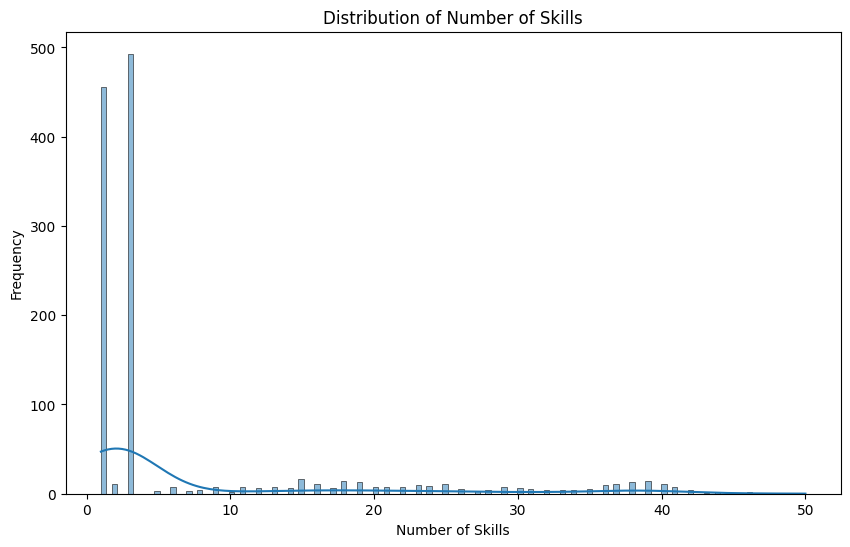

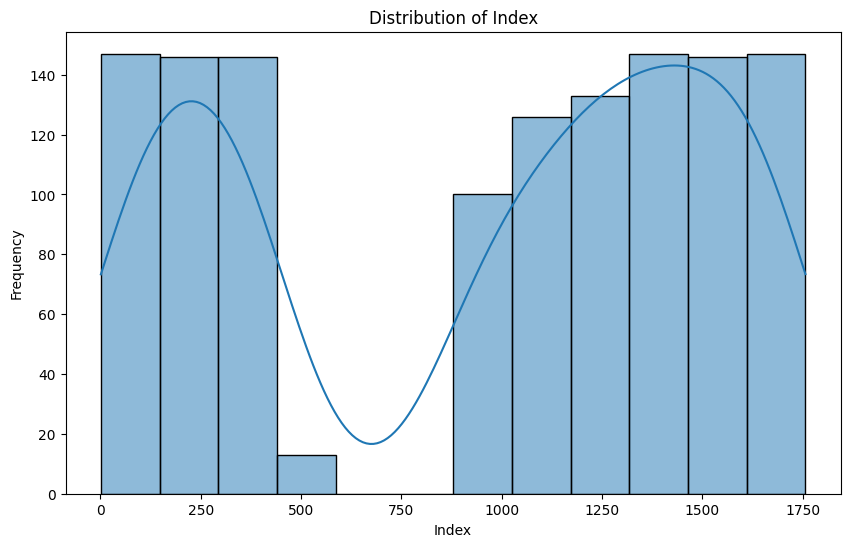

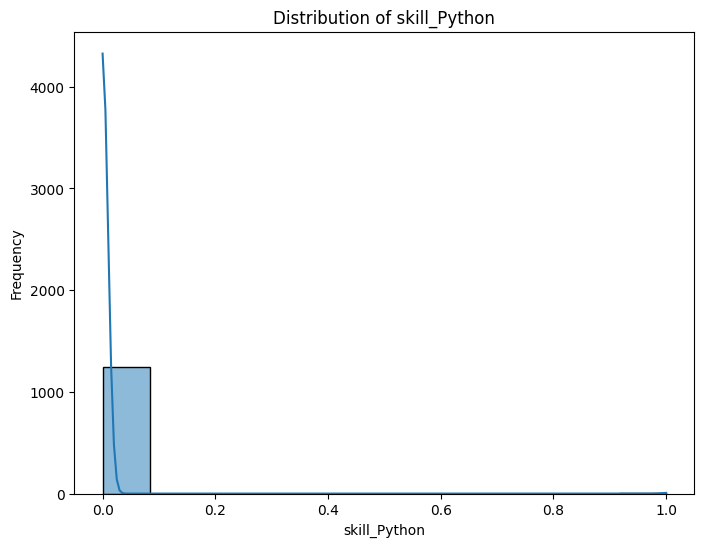

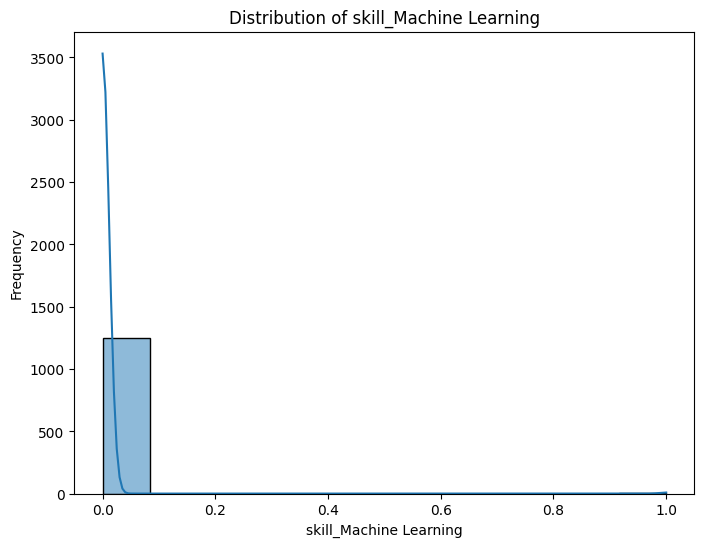

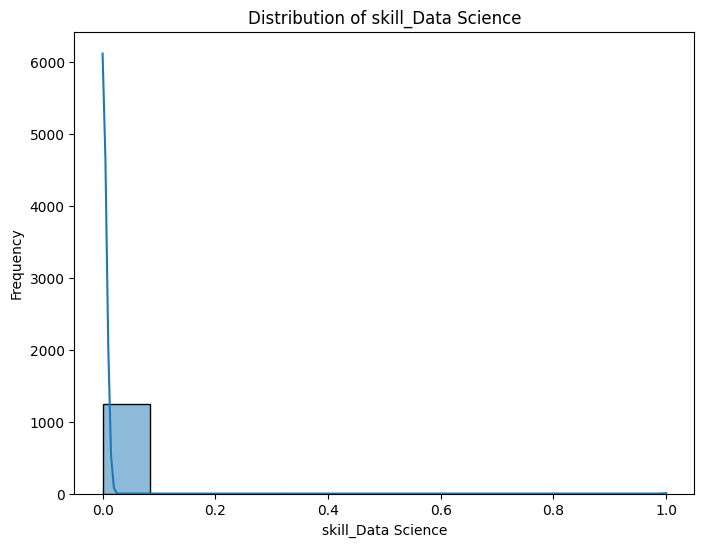

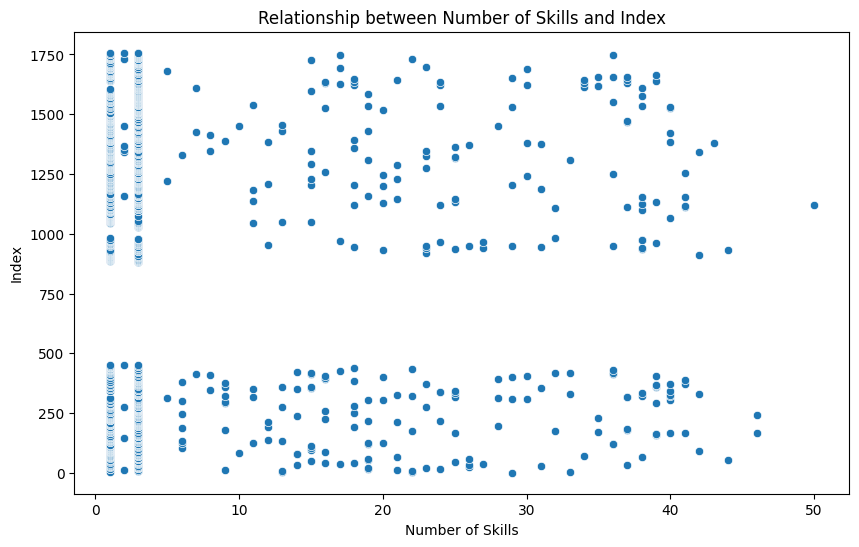

ValueError: Could not interpret value `category` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze distributions of key features
plt.figure(figsize=(10, 6))
sns.histplot(df_engineered['num_skills'], kde=True)
plt.title('Distribution of Number of Skills')
plt.xlabel('Number of Skills')
plt.ylabel('Frequency')
plt.savefig('num_skills_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_engineered['index'], kde=True)
plt.title('Distribution of Index')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.savefig('index_distribution.png')
plt.show()

for skill in ['skill_Python', 'skill_Machine Learning', 'skill_Data Science']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_engineered[skill], kde=True)
    plt.title(f'Distribution of {skill}')
    plt.xlabel(skill)
    plt.ylabel('Frequency')
    plt.savefig(f'{skill}_distribution.png')
    plt.show()

# Visualize relationships between features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_skills', y='index', data=df_engineered)
plt.title('Relationship between Number of Skills and Index')
plt.xlabel('Number of Skills')
plt.ylabel('Index')
plt.savefig('num_skills_vs_index.png')
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='num_skills', data=df_engineered)
plt.title('Distribution of Number of Skills across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Skills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('num_skills_by_category.png')
plt.show()

# Count plots
for col in ['category', 'location', 'position']:
  top_categories = df_engineered[col].value_counts().nlargest(10).index
  plt.figure(figsize=(12, 6))
  sns.countplot(x=col, data=df_engineered[df_engineered[col].isin(top_categories)])
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.savefig(f'{col}_distribution.png')
  plt.show()

**Reasoning**:
The previous code block failed due to a ValueError, indicating that the 'category' column is not found in the `df_engineered` DataFrame.  The error likely arose from the one-hot encoding process where 'category' was transformed into multiple dummy columns.  I need to modify the boxplot code to use one of the newly generated dummy columns or adjust the plotting code accordingly. I will try plotting the `num_skills` distribution against one of the dummy variables derived from the 'category' column.



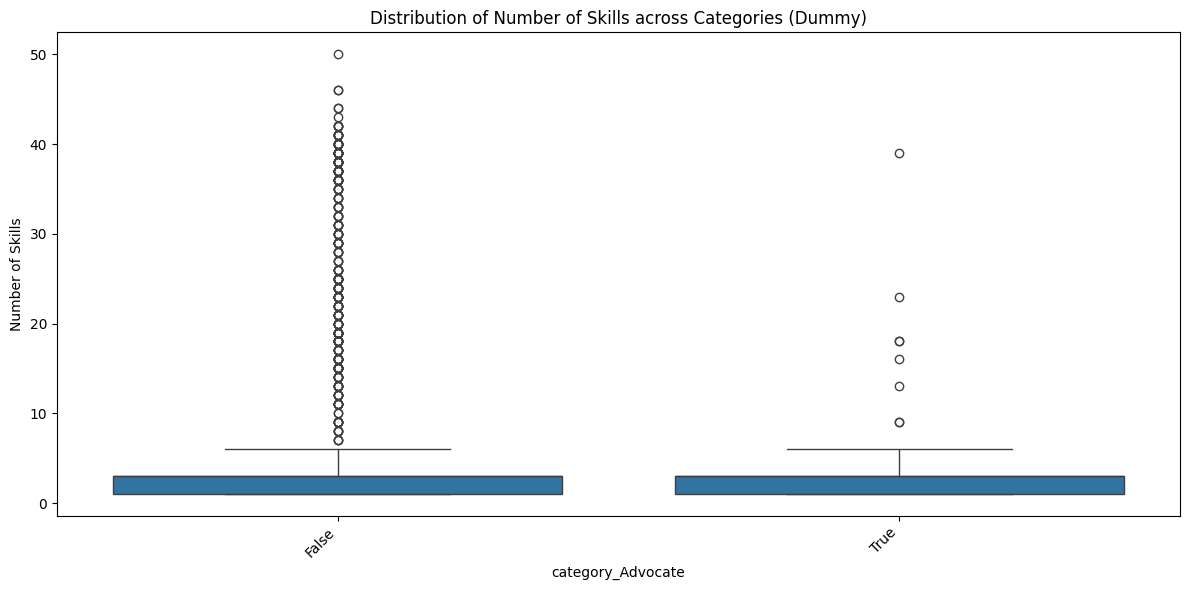

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Previous code remains the same)

# Box plots - corrected
category_dummy_cols = [col for col in df_engineered.columns if col.startswith('category_')]
if category_dummy_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=category_dummy_cols[0], y='num_skills', data=df_engineered)
    plt.title('Distribution of Number of Skills across Categories (Dummy)')
    plt.xlabel(category_dummy_cols[0])
    plt.ylabel('Number of Skills')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('num_skills_by_category_dummy.png')
    plt.show()
else:
    print("No dummy columns found for 'category'.")

# ... (Rest of the code remains the same)

## Model training

### Subtask:
Train a RandomForestClassifier model on the prepared dataset.


**Reasoning**:
Train a RandomForestClassifier model on the prepared dataset.  The target variable is 'category' or one of its one-hot encoded columns. Split the data, train the model, and make predictions.



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Check for the presence of 'category' column. If not present, use a dummy column.
if 'category' in df_engineered.columns:
    target_column = 'category'
else:
    category_dummy_cols = [col for col in df_engineered.columns if col.startswith('category_')]
    if category_dummy_cols:
        target_column = category_dummy_cols[0]  # Use the first dummy column
    else:
        print("Error: 'category' column and its dummy columns not found.")
        # Handle the error appropriately (e.g., exit or use a default target)
        target_column = None

if target_column:
    X = df_engineered.drop(columns=[target_column, 'linkedin', 'profile_picture', 'description', 'Experience', 'Name', 'skills', 'clean_skills'])
    y = df_engineered[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize and train the RandomForestClassifier model
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)
    print(y_pred)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

## Model evaluation

### Subtask:
Evaluate the performance of the trained RandomForestClassifier model.


**Reasoning**:
Evaluate the trained RandomForestClassifier model using accuracy_score, classification_report, and confusion_matrix.  Visualize the confusion matrix as a heatmap.



Accuracy: 0.9760956175298805

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       240
        True       1.00      0.45      0.62        11

    accuracy                           0.98       251
   macro avg       0.99      0.73      0.81       251
weighted avg       0.98      0.98      0.97       251



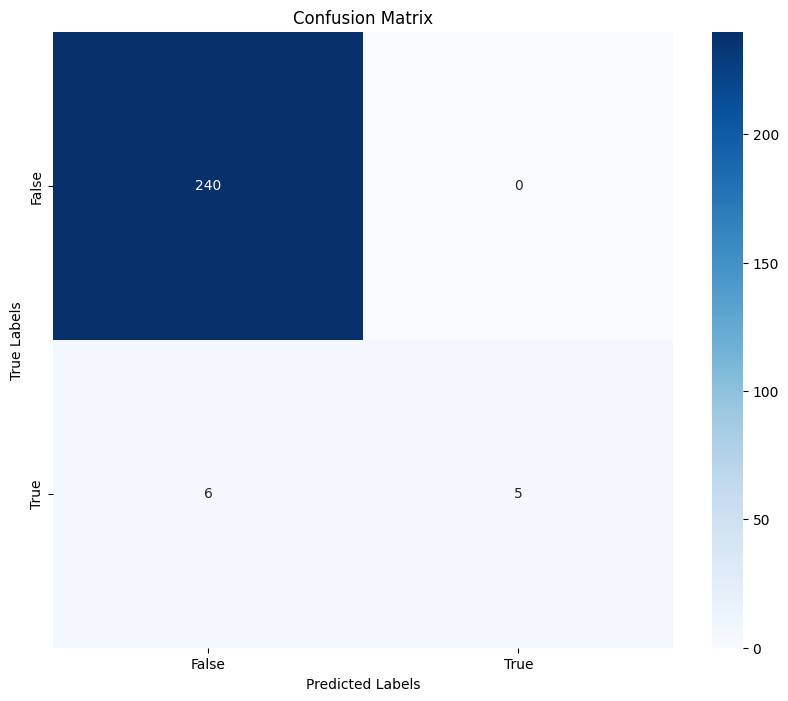

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous model training step

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Analyze the results
# Discuss the implications of the results in the context of the business problem.
# (Add analysis and discussion here based on the obtained metrics)

## 1.Oversampling the Minority Class using SMOTE

Reasoning: SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic samples of the minority class to balance the dataset.

Steps:

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) #Removed extra indent
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### 2.Undersampling the Majority Class using RandomUnderSampler

Reasoning: RandomUnderSampler randomly removes samples from the majority class to balance the dataset.

Steps:

In [15]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42) #Removed extra indent
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

## 3.Using Class Weights during Model Training

Reasoning: Assigning higher weights to the minority class during training gives it more importance.

Steps:

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42) # Removed extra space before this line
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

### Hyperparameter Tuning using GridSearchCV

Reasoning: GridSearchCV exhaustively searches through a specified hyperparameter grid to find the best combination for your model.

Steps:

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Using the Best Model:

In [19]:
y_pred = best_model.predict(X_test)